<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
 12  Defaultee   400 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 40.8+ KB
   Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender  Student  \
0           1   14.891   3606     283      2   34         11    Male        0   
1           2  106.025   6645     483      3   82      

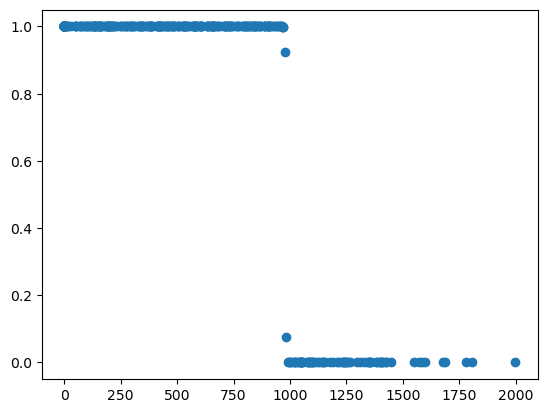

[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>
[[6.13800136e-01 7.09983100e-07 4.59299437e-02]]
[-603.55685826]
accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        24

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



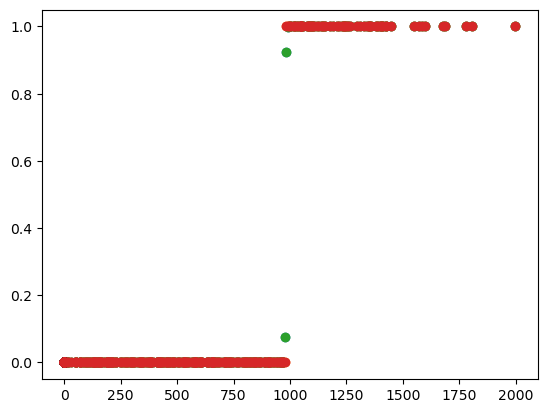

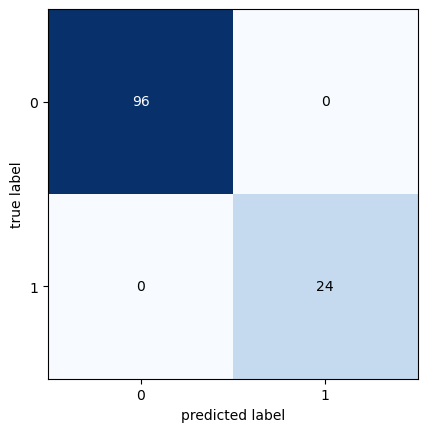

   Feature     F-Value       P-Value
0  Balance  169.903057  1.326267e-24
1  Student    6.464834  1.229753e-02
2   Income   30.587183  1.947321e-07


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LR2=pd.read_csv('credit.csv')
LR2
LR2.head()
LR2.shape
LR2.columns
LR2.info()
LR2.describe()
LR2.Defaultee.value_counts()


LR2['Defaultee']=LR2['Defaultee'].replace(['No','yes'],[0,1])
LR2['Student']=LR2['Student'].map({'No':0,'Yes':1})


LR2.Student.value_counts()


X=LR2[['Balance']]
y=LR2['Defaultee']


print(LR2.head())
LR2.shape


# Apply Logistic Regression to verifiy the concept of sigmoid or logit function
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X,y)
y_pred=logreg.predict_proba(X)


y_pred.shape


#Probability for Class 0
np.round(y_pred[:,0],3)


#Probability for Class 1
np.round(y_pred[:,1],3)


(y_pred[:,0])+(y_pred[:,1])


#now see the sigmoid curve.
plt.scatter(X.values,y_pred[:,0])

plt.show()

plt.scatter(X.values,y_pred[:,1])

plt.scatter(X.values,y)

plt.scatter(X.values,y_pred[:,1])
plt.scatter(X.values,y)
plt.show


# Creating logistic regression model using all variables
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,average_precision_score,confusion_matrix,f1_score
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

LR2.sample(n=10,random_state=1)

X=LR2[['Balance','Student','Income']]
y=LR2['Defaultee']

X
X.head()

y
y.head()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


logreg=LogisticRegression()
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
print(y_pred)
print(type(y_pred))
y_pred.size


print(logreg.coef_)
print(logreg.intercept_)


coef=pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))],axis=1)
coef


log_accuracy=metrics.accuracy_score(y_test,y_pred)
print("accuracy score:",log_accuracy)
classification=metrics.classification_report(y_test,y_pred)
print(classification)

#create confusion metrics to understand the classification
conf=metrics.confusion_matrix(y_test,y_pred)
conf

from mlxtend.plotting import plot_confusion_matrix


fig,ax=plot_confusion_matrix(conf_mat=conf)
plt.show()

from sklearn.feature_selection import f_classif

# Perform ANOVA test for feature significance
f_values, p_values = f_classif(X_test, y_pred)

# Create a table for feature significance
anova_results = pd.DataFrame({'Feature': X_test.columns, 'F-Value': f_values, 'P-Value': p_values})
print(anova_results)




